# NOTEBOOK FOR PYPSA-DISTRIBUTION:

This notebook is designed to analyze the output of simulations performed using the pypsa-distribution tool.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import pypsa
import matplotlib.dates as mdates
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import xarray as xr
import seaborn as sns

c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\networkclustering.py:16: UserWarning:

The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 



In [2]:
base_dir = "C:/Users/margh/Desktop/pypsa-project/pypsa-distribution" # Edit this string with the top of the path where you saved the pypsa-distribution folder

buildings_path = base_dir+"/resources/buildings/microgrid_building.geojson"
cluster_with_buildings =base_dir+'/resources/buildings/cluster_with_buildings.geojson'
clustered_path = base_dir+"/resources/buildings/clustered_buildings.geojson"
shape_path = base_dir+"/resources/shapes/microgrid_shapes.geojson"
network_path = base_dir+"/networks/results/elec.nc"

tier_3_path_type_profile=base_dir+"/resources/ramp/daily_type_demand_Tier3.xlsx"
tier_3_path_profile=base_dir+"/resources/ramp/daily_demand_Tier3.xlsx"
demand_path=base_dir+'/resources/demand/microgrid_load.csv'
solar_profile_path = base_dir+'/resources/renewable_profiles/profile_solar.nc'
wind_profile_path = base_dir+'/resources/renewable_profiles/profile_onwind.nc'


### BUILDINGS AND NETWORK:

This part of the notebook displays outputs related to buildings, their clustering and the network.

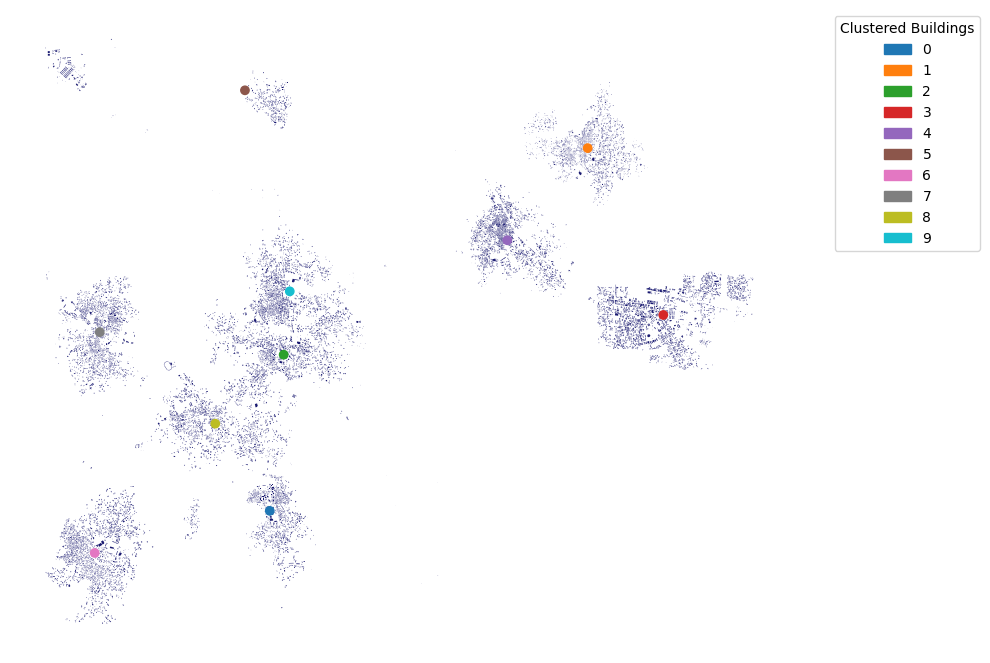

In [3]:
fig, ax = plt.subplots(figsize=(10, 20), subplot_kw={'projection': ccrs.PlateCarree()})

buildings = gpd.read_file(buildings_path)
clustered = gpd.read_file(clustered_path)


clustered = gpd.read_file(clustered_path)
buildings.plot(ax=ax, legend=False, label='Buildings', color="midnightblue", markersize=0.01)
clustered.plot(ax=ax, legend=False, alpha=1, label='Clustered Buildings', cmap='tab10')

ax.set_frame_on(False)

cmap = cm.get_cmap('tab10')
clustered_labels = clustered['cluster'].unique() 
legend_handles = [mpatches.Patch(color=cmap(i), label=label) for i, label in enumerate(clustered_labels)]
ax.legend(handles=legend_handles, title='Clustered Buildings', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

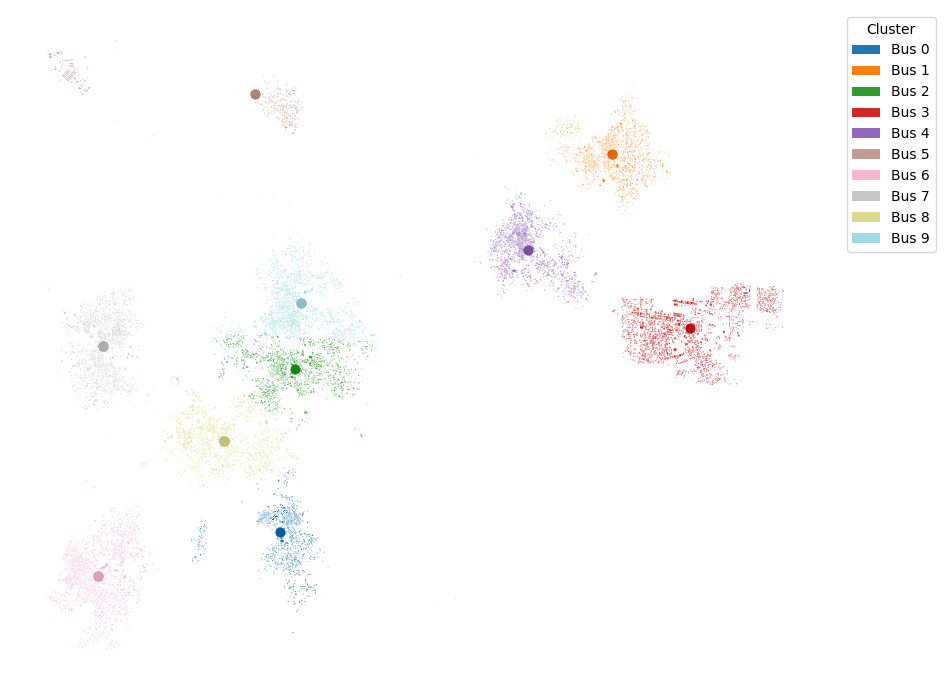

In [4]:
buildings_gdf = gpd.read_file(cluster_with_buildings)  
centroids_gdf = gpd.read_file(clustered_path)


if buildings_gdf.crs is None:
    buildings_gdf = buildings_gdf.set_crs(epsg=4326)
else:
    buildings_gdf = buildings_gdf.to_crs(epsg=4326)

if centroids_gdf.crs is None:
    centroids_gdf = centroids_gdf.set_crs(epsg=4326)
else:
    centroids_gdf = centroids_gdf.to_crs(epsg=4326)


cmap = cm.get_cmap('tab20', len(buildings_gdf['cluster_id'].unique()))  # Usa tab20 per colori ben distinti

fig, ax1 = plt.subplots(figsize=(10, 7))

buildings_gdf.plot(column='cluster_id', ax=ax1, cmap='tab20', legend=False, edgecolor='none')

legend_elements = []
for cluster_id in centroids_gdf['cluster'].unique():
    cluster_buildings = buildings_gdf[buildings_gdf['cluster_id'] == cluster_id]
    cluster_centroid = centroids_gdf[centroids_gdf['cluster'] == cluster_id]
    
    color_idx = int(cluster_id) % cmap.N
    cluster_color = cmap(color_idx)
    
    centroid_color = tuple([max(0, c - 0.1) for c in mcolors.to_rgb(cluster_color)])

    ax1.scatter(cluster_centroid.geometry.x, cluster_centroid.geometry.y, color=centroid_color, 
               label=f'Cluster {cluster_id}', s=50, edgecolor='black', linewidth=0.1)

    legend_elements.append(mpatches.Patch(facecolor=cluster_color, edgecolor='none', label=f'Bus {cluster_id}'))


ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax1.legend(handles=legend_elements, title="Cluster", loc="upper right", bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\com

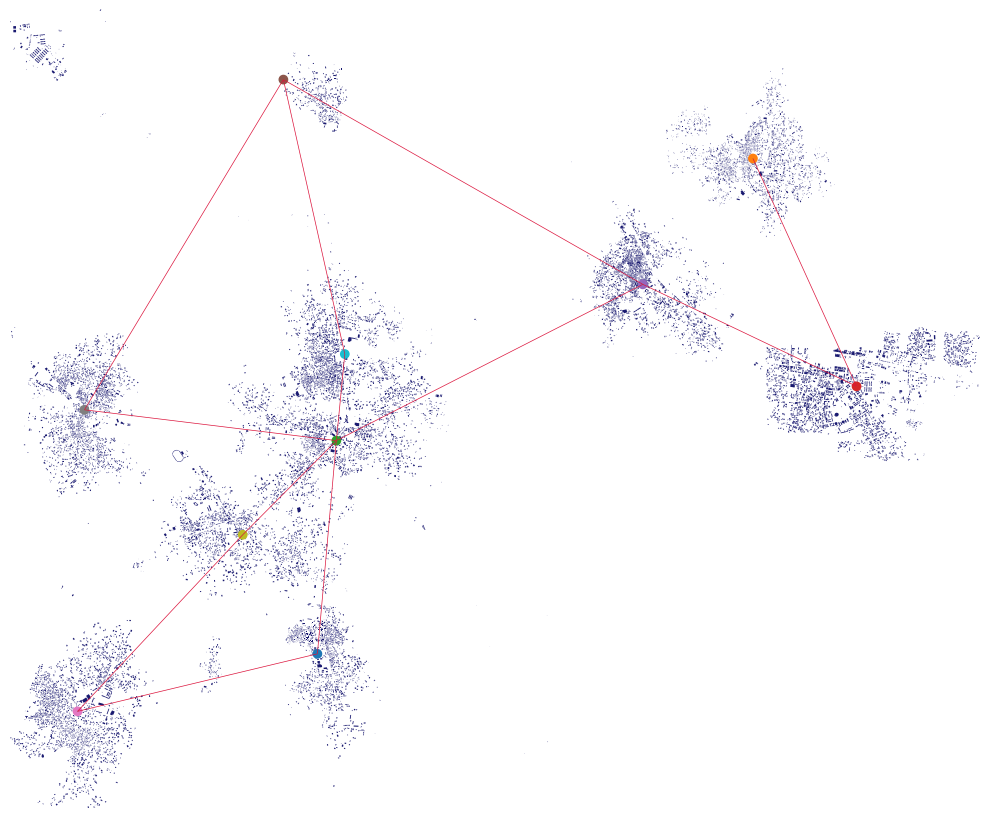

In [5]:
network = pypsa.Network(network_path)
n=network

fig, ax = plt.subplots(figsize=(10, 15), subplot_kw={'projection': ccrs.PlateCarree()})


buildings.plot(ax=ax, legend=False, label='Buildings', color="midnightblue", markersize=0.0001)
clustered.plot(ax=ax, legend=False, alpha=1, label='Clustered Buildings', cmap='tab10')


n.plot(ax=ax, bus_sizes=0.0000000009, bus_colors="limegreen", line_colors="crimson", line_widths=0.5, projection=ccrs.PlateCarree())


ax.set_xlim([buildings.total_bounds[0], buildings.total_bounds[2]])
ax.set_ylim([buildings.total_bounds[1], buildings.total_bounds[3]])


ax.set_frame_on(False)


cmap = cm.get_cmap('tab10')
clustered_labels = clustered['cluster'].unique() 


plt.tight_layout()
plt.show()


c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\margh\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\com

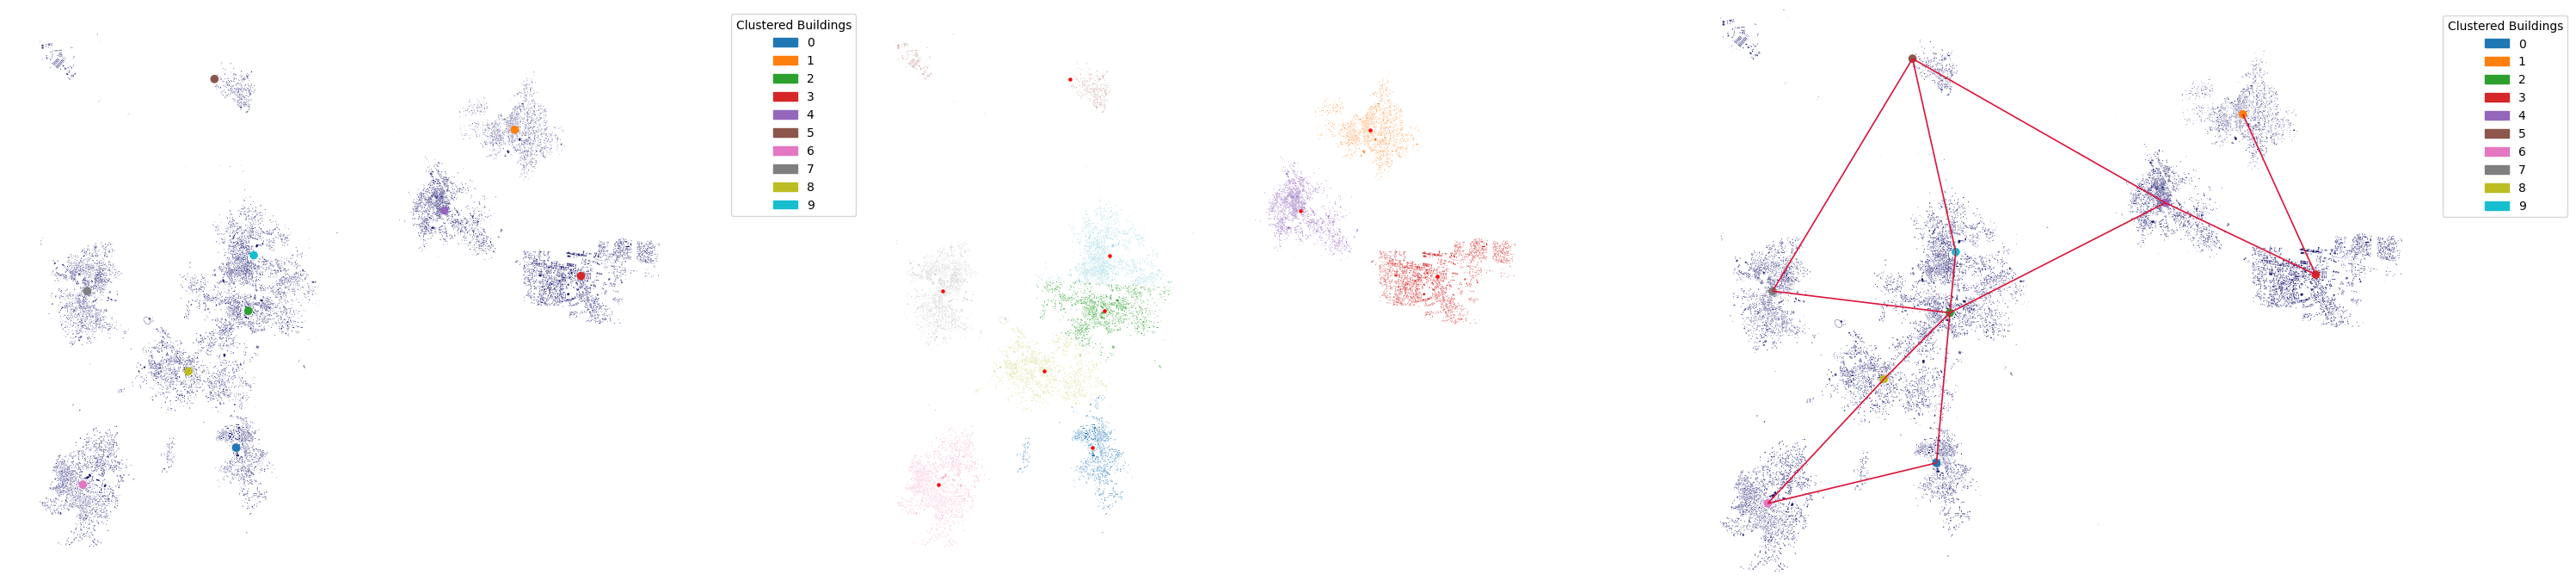

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': ccrs.PlateCarree()})


buildings = gpd.read_file(buildings_path)
clustered = gpd.read_file(clustered_path)

buildings.plot(ax=ax1, legend=False, label='Buildings', color="midnightblue", markersize=0.0001)
clustered.plot(ax=ax1, legend=False, alpha=1, label='Clustered Buildings', cmap='tab10')

ax1.set_frame_on(False)
cmap1 = cm.get_cmap('tab10')
clustered_labels = clustered['cluster'].unique() 
legend_handles1 = [mpatches.Patch(color=cmap1(i), label=label) for i, label in enumerate(clustered_labels)]
ax1.legend(handles=legend_handles1, title='Clustered Buildings', loc='upper left', bbox_to_anchor=(1.05, 1))



buildings_gdf = gpd.read_file(cluster_with_buildings)
centroids_gdf = gpd.read_file(clustered_path)


if buildings_gdf.crs is None:
    buildings_gdf = buildings_gdf.set_crs(epsg=4326)
else:
    buildings_gdf = buildings_gdf.to_crs(epsg=4326)

if centroids_gdf.crs is None:
    centroids_gdf = centroids_gdf.set_crs(epsg=4326)
else:
    centroids_gdf = centroids_gdf.to_crs(epsg=4326)


buildings_gdf.plot(ax=ax2, column='cluster_id', cmap='tab20', markersize=0.01)
centroids_gdf.plot(ax=ax2, color='red', markersize=5)

ax2.set_frame_on(False)



network = pypsa.Network(network_path)
n = network


buildings.plot(ax=ax3, legend=False, label='Buildings', color="midnightblue", markersize=0.0001)
clustered.plot(ax=ax3, legend=False, alpha=1, label='Clustered Buildings', cmap='tab10')


n.plot(ax=ax3, bus_sizes=0.0000000009, bus_colors="limegreen", line_colors="crimson", line_widths=1.2, projection=ccrs.PlateCarree())


ax3.set_xlim([buildings.total_bounds[0], buildings.total_bounds[2]])
ax3.set_ylim([buildings.total_bounds[1], buildings.total_bounds[3]])


ax3.set_frame_on(False)


cmap3 = cm.get_cmap('tab10')
clustered_labels = clustered['cluster'].unique() 
legend_handles3 = [mpatches.Patch(color=cmap3(i), label=label) for i, label in enumerate(clustered_labels)]
ax3.legend(handles=legend_handles3, title='Clustered Buildings', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


### PLOT ABOUT RAMP-DEMAND: 

You can change the tier selected just changing the path in the upper part of the code.

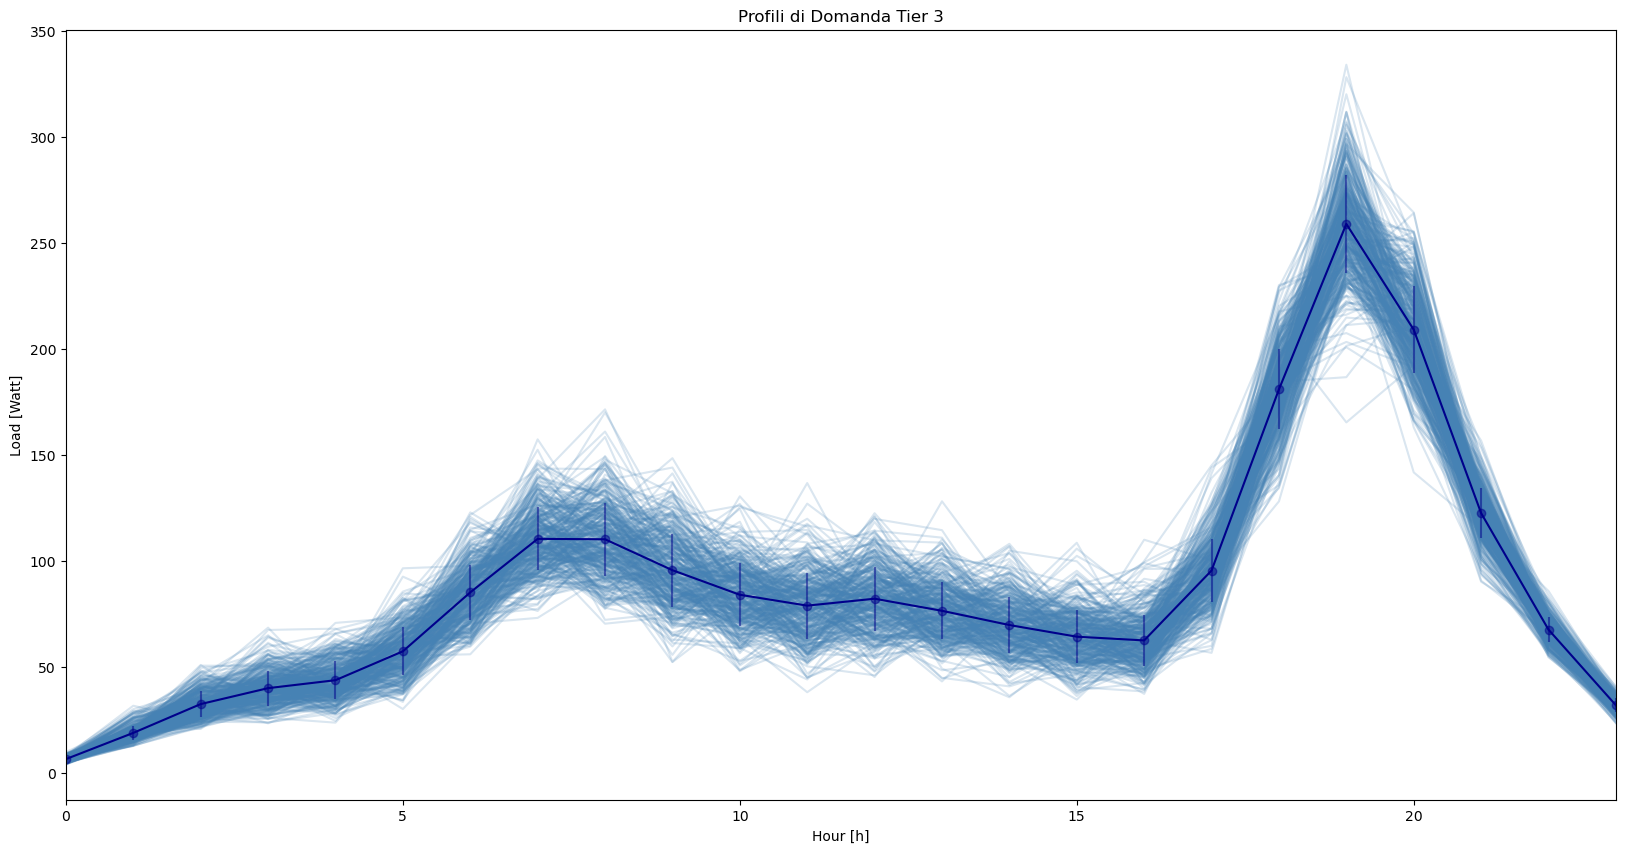

In [7]:
df = pd.read_excel(tier_3_path_type_profile)
df3 = pd.read_excel(tier_3_path_profile)

fig, ax = plt.subplots(figsize=(20, 10))

df3.plot(
    ax=ax, label="Daily Demand Profile", legend=False, color="steelblue", alpha=0.2
)
df["mean"].plot(ax=ax, label="Mean Demand Profile", legend=False, color="darkblue")
ax.errorbar(
    df.index,
    df["mean"],
    yerr=df["std"],
    fmt="o",
    color="darkblue",
    alpha=0.5,
    label="Deviazione Standard",
)

ax.set_xlabel("Hour [h]")
ax.set_ylabel("Load [Watt]")

ax.set_xlim(0, 23)

ax.set_title("Profili di Domanda Tier 3")
plt.show()

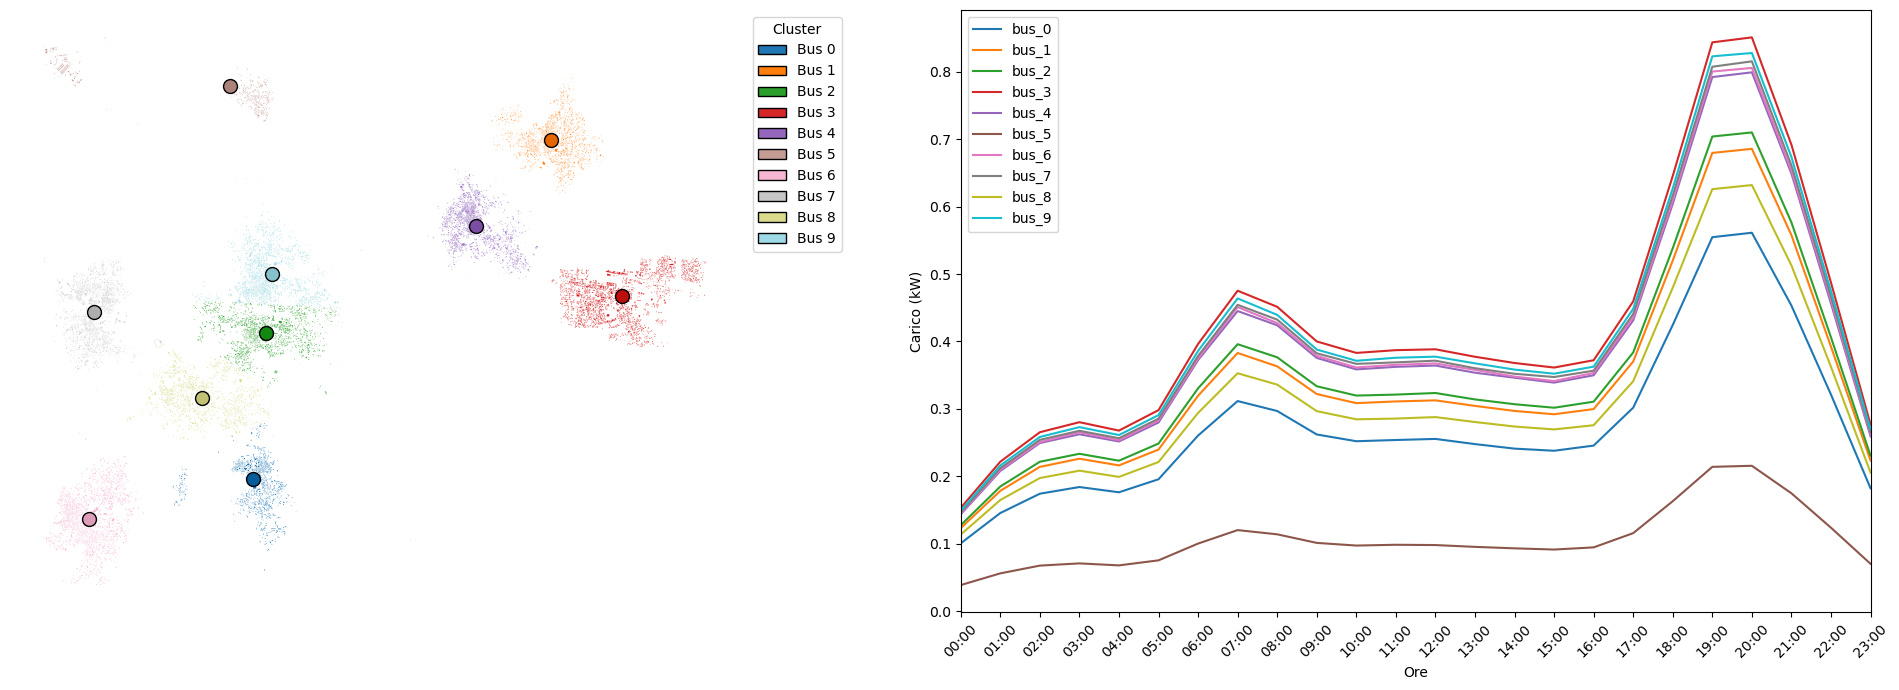

In [8]:
df = pd.read_csv(demand_path)

df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

df_week = df[df['Unnamed: 0'] < df['Unnamed: 0'].min() + pd.Timedelta(days=1)]

colors = [
    '#1f77b4',  # Cluster 0 (Blue)
    '#ff7f0e',  # Cluster 1 (Orange)
    '#2ca02c',  # Cluster 2 (Green)
    '#d62728',  # Cluster 3 (Red)
    '#9467bd',  # Cluster 4 (Purple)
    '#8c564b',  # Cluster 5 (Brown)
    '#e377c2',  # Cluster 6 (Pink)
    '#7f7f7f',  # Cluster 7 (Gray)
    '#bcbd22',  # Cluster 8 (Yellow)
    '#17becf'   # Cluster 9 (Cyan)
]

buildings_gdf = gpd.read_file(cluster_with_buildings)  
centroids_gdf = gpd.read_file(clustered_path)  

if buildings_gdf.crs is None:
    buildings_gdf = buildings_gdf.set_crs(epsg=4326)
else:
    buildings_gdf = buildings_gdf.to_crs(epsg=4326)

if centroids_gdf.crs is None:
    centroids_gdf = centroids_gdf.set_crs(epsg=4326)
else:
    centroids_gdf = centroids_gdf.to_crs(epsg=4326)

cmap = cm.get_cmap('tab20', len(buildings_gdf['cluster_id'].unique()))  # Usa tab20 per colori ben distinti

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

buildings_gdf.plot(column='cluster_id', ax=ax1, cmap='tab20', legend=False, edgecolor='none')

legend_elements = []

for cluster_id in centroids_gdf['cluster'].unique():
    cluster_buildings = buildings_gdf[buildings_gdf['cluster_id'] == cluster_id]
    cluster_centroid = centroids_gdf[centroids_gdf['cluster'] == cluster_id]
    
    color_idx = int(cluster_id) % cmap.N
    cluster_color = cmap(color_idx)
    
    centroid_color = tuple([max(0, c - 0.1) for c in mcolors.to_rgb(cluster_color)])

    ax1.scatter(cluster_centroid.geometry.x, cluster_centroid.geometry.y, color=centroid_color, 
               label=f'Cluster {cluster_id}', s=100, edgecolor='black', linewidth=1)

    legend_elements.append(mpatches.Patch(facecolor=cluster_color, edgecolor='black', label=f'Bus {cluster_id}'))


ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Aggiungi una legenda compatta
ax1.legend(handles=legend_elements, title="Cluster", loc="upper right", bbox_to_anchor=(1.15, 1))

# ---- Grafico a destra: Carico dei Bus ----
# Traccia ogni bus con il colore corrispondente
for i, col in enumerate(df.columns[1:]):  # Assumo che i bus siano nelle colonne successive alla prima
    ax2.plot(df_week['Unnamed: 0'], df_week[col], label=col, color=colors[i])

# Imposta i limiti per l'asse X da 00:00 a 24:00
ax2.set_xlim([df_week['Unnamed: 0'].min().replace(hour=0), df_week['Unnamed: 0'].min().replace(hour=23)])

# Formattazione dell'asse X per mostrare solo le ore
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Intervallo di 1 ora
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Mostra solo l'ora

# Aggiungi titolo e etichette
ax2.set_xlabel("Ore")
ax2.set_ylabel("Carico (kW)")


# Rotazione dei tick dell'asse X
ax2.tick_params(axis='x', rotation=45)

# Aggiungi la legenda
ax2.legend(loc="best")

# Mostra i grafici affiancati
plt.tight_layout()
plt.show()

### OPTIMAL SYSTEM CONFIGURATION ANALYSIS OF PRODUCIBILITY AND DISPATCH:

Be careful in case the simulation was conducted in tutorial mode, the results are not reliable.
The tutorial mode is only useful for the purpose of getting familiar with the tool, but not for obtaining realistic outputs.
(The units of measurement are in MW or MWh)


#### MAXIMUM AVAILABILITY FROM RENEWABLE SOURCES FOR THE SELECTED AREA:

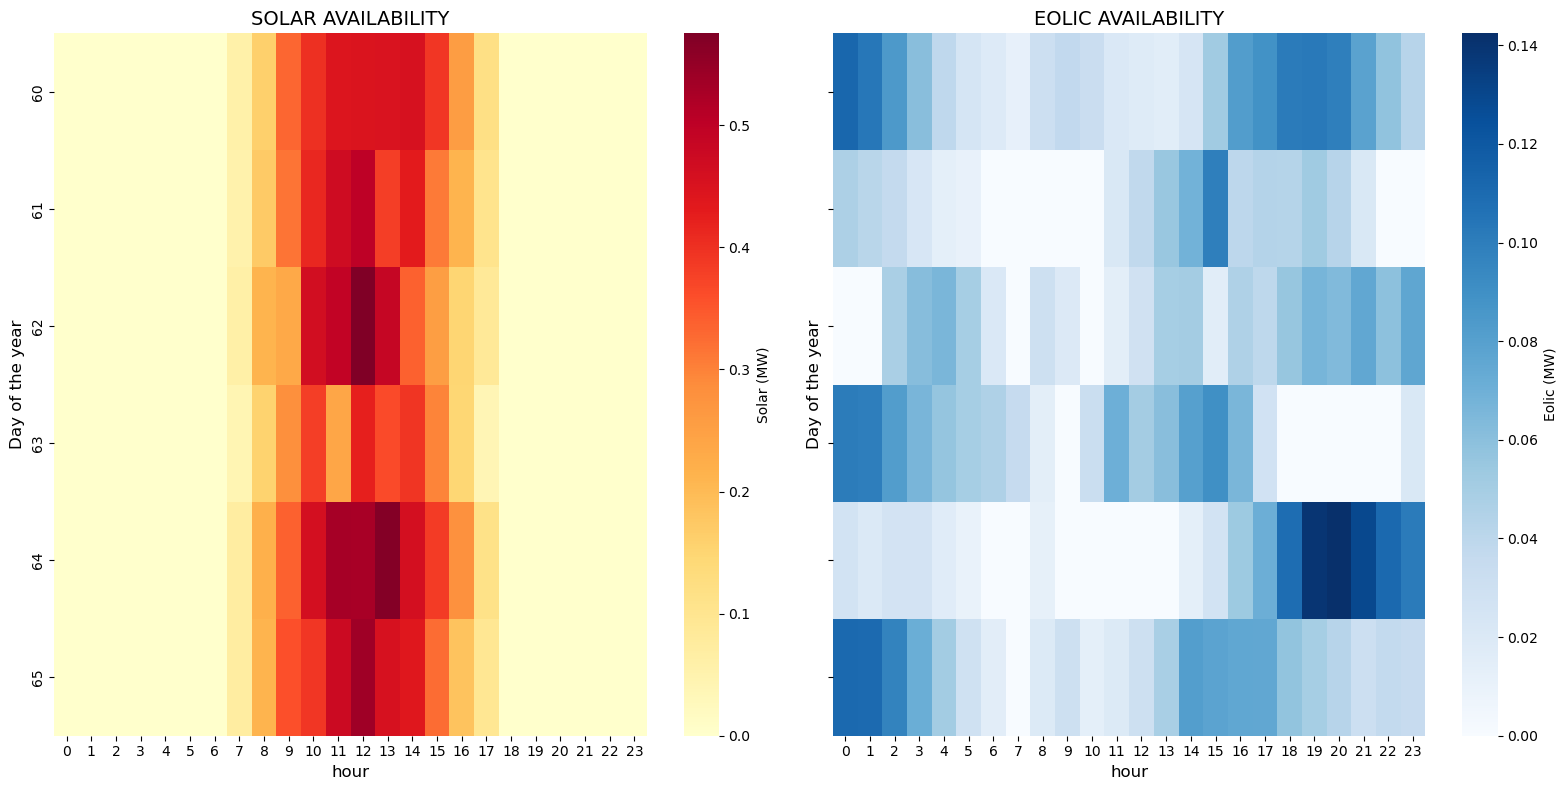

In [9]:
# Carica i file NetCDF
solar_data = xr.open_dataset(solar_profile_path)
wind_data = xr.open_dataset(wind_profile_path)

solar_profile = solar_data['profile'][:, 0].values 
wind_profile = wind_data['profile'][:, 0].values 

time = pd.to_datetime(solar_data['time'].values)

df_solar = pd.DataFrame({'time': time, 'solar_profile': solar_profile})
df_solar.set_index('time', inplace=True)

df_wind = pd.DataFrame({'time': time, 'wind_profile': wind_profile})
df_wind.set_index('time', inplace=True)

df_solar['hour'] = df_solar.index.hour
df_solar['day_of_year'] = df_solar.index.dayofyear

df_wind['hour'] = df_wind.index.hour
df_wind['day_of_year'] = df_wind.index.dayofyear


solar_matrix = df_solar.pivot_table(index='day_of_year', columns='hour', values='solar_profile')
wind_matrix = df_wind.pivot_table(index='day_of_year', columns='hour', values='wind_profile')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)


sns.heatmap(solar_matrix, cmap="YlOrRd", ax=axes[0], cbar_kws={'label': 'Solar (MW)'})
axes[0].set_title('SOLAR AVAILABILITY', fontsize=14)
axes[0].set_xlabel('hour', fontsize=12)
axes[0].set_ylabel('Day of the year', fontsize=12)


sns.heatmap(wind_matrix, cmap="Blues", ax=axes[1], cbar_kws={'label': 'Eolic (MW)'})
axes[1].set_title('EOLIC AVAILABILITY', fontsize=14)
axes[1].set_xlabel('hour', fontsize=12)
axes[1].set_ylabel('Day of the year', fontsize=12)


plt.tight_layout()

plt.show()

#### ENERGY BALANCE PLOT:

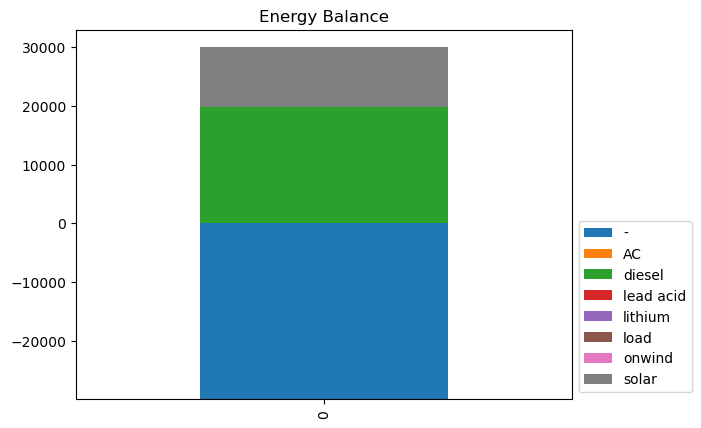

In [10]:
fig, ax = plt.subplots()
n.statistics.energy_balance().loc[:, :, "AC"].groupby(
    "carrier"
).sum().to_frame().T.plot.bar(stacked=True, ax=ax, title="Energy Balance")
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)

In [11]:
display(n.statistics.optimal_capacity())

             carrier  
Generator    diesel       6.910620e+00
             load         1.000000e+10
             onwind       0.000000e+00
             solar        1.148830e+01
StorageUnit  lead acid    0.000000e+00
             lithium      0.000000e+00
Line         AC           1.427265e+01
dtype: float64

#### HEATMAP DIESEL AND BATTERY:

C:\Users\margh\AppData\Local\Temp\ipykernel_24120\3174395116.py:29: UserWarning:

Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.



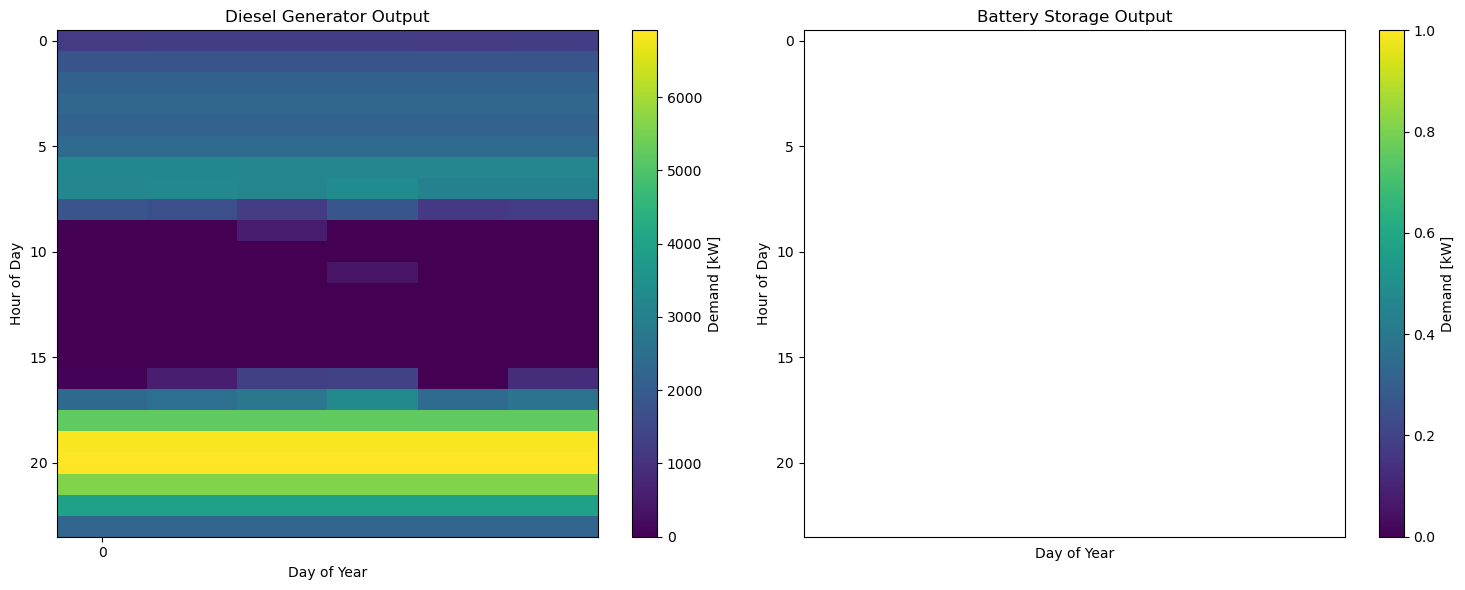

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Dati diesel
dispatch = n.generators_t.p.iloc[0:len(n.generators_t.p)] * 1000
diesel = dispatch['C1']
diesel_matrix = diesel.values.reshape(-1, 24)

# Dati battery
battery = n.storage_units_t.p.iloc[0:len(n.storage_units_t.p)] * 1000   # If there's no capacity installed, comment the part of the battery
battery_matrix = battery.values.reshape(-1, 24)

# Creazione della figura e dei subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primo subplot: Diesel Generator Output
im1 = axes[0].imshow(diesel_matrix.T, cmap='viridis', aspect='auto')
axes[0].set_xlabel('Day of Year')
axes[0].set_ylabel('Hour of Day')
axes[0].set_title('Diesel Generator Output')
# Tick dell'asse X
num_days_diesel = diesel_matrix.shape[0]
axes[0].set_xticks(np.arange(0, num_days_diesel, step=30))
axes[0].set_xticklabels(np.arange(0, num_days_diesel, step=30))
# Barra dei colori
fig.colorbar(im1, ax=axes[0], label='Demand [kW]')

# Secondo subplot: Battery Storage Output
im2 = axes[1].imshow(battery_matrix.T, cmap='viridis', aspect='auto')
axes[1].set_xlabel('Day of Year')
axes[1].set_ylabel('Hour of Day')
axes[1].set_title('Battery Storage Output')
# Tick dell'asse X
num_days_battery = battery_matrix.shape[0]
axes[1].set_xticks(np.arange(0, num_days_battery, step=30))
axes[1].set_xticklabels(np.arange(0, num_days_battery, step=30))
# Barra dei colori
fig.colorbar(im2, ax=axes[1], label='Demand [kW]')

# Layout della figura
plt.tight_layout()
plt.show()


#### PLOT DISPATCH 

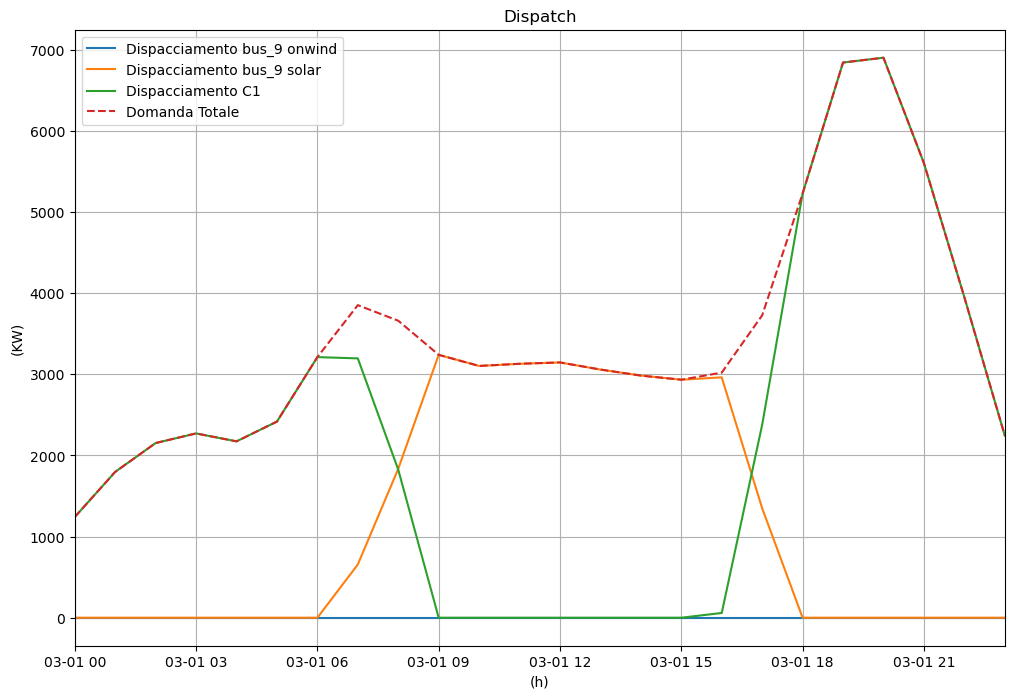

In [17]:
dispatch = n.generators_t.p.iloc[0:24] * 1000 #Select the time window
loads = n.loads_t.p.iloc[0:24] * 1000
battery = n.storage_units_t.p.iloc[0:24] * 1000  # If there's no capacity installed, comment the part of the battery

# Somma la domanda totale per ogni ora
total_loads = loads.sum(axis=1)

# Plot dei risultati di dispacciamento, domanda totale e batteria
plt.figure(figsize=(12, 8))
index = ['bus_9 onwind', 'bus_9 solar', 'C1']

# Plot del dispacciamento dei generatori
for gen in index:
    plt.plot(dispatch.index, dispatch[gen], label=f'Dispacciamento {gen}')

# Plot della domanda totale
plt.plot(total_loads.index, total_loads, '--', label='Domanda Totale')

# Plot dell'andamento della batteria
#plt.plot(battery.index, battery['microgrid_1 lithium'], ':', label='Andamento Batteria')

# Imposta i limiti dell'asse x sull'intervallo dei dati
plt.xlim(dispatch.index[0], dispatch.index[-1])

# Aggiunta di etichette e titolo
plt.xlabel('(h)')
plt.ylabel('(KW)')
plt.title('Dispatch')
plt.legend()
plt.grid()

plt.show()
